In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('/content/Twitter Sentiments.csv')


In [ ]:
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['tweet'].values)

X = tokenizer.texts_to_sequences(data['tweet'].values)
X = pad_sequences(X)

Y = pd.get_dummies(data['label']).values


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
model = Sequential()
model.add(Embedding(5000, 256))
model.add(LSTM(256, dropout=0.3))
model.add(Dense(2, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
800/800 [==============================] - 199s 245ms/step - loss: 0.1567 - accuracy: 0.9486
Epoch 2/10
800/800 [==============================] - 194s 243ms/step - loss: 0.0857 - accuracy: 0.9703
Epoch 3/10
800/800 [==============================] - 195s 243ms/step - loss: 0.0564 - accuracy: 0.9799
Epoch 4/10
800/800 [==============================] - 197s 246ms/step - loss: 0.0372 - accuracy: 0.9867
Epoch 5/10
800/800 [==============================] - 189s 236ms/step - loss: 0.0236 - accuracy: 0.9915
Epoch 6/10
800/800 [==============================] - 189s 236ms/step - loss: 0.0152 - accuracy: 0.9952
Epoch 7/10
800/800 [==============================] - 189s 236ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 8/10
800/800 [==============================] - 189s 236ms/step - loss: 0.0096 - accuracy: 0.9964
Epoch 9/10
800/800 [==============================] - 189s 237ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 10/10
800/800 [==============================] - 189s 236m

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=32)
print('Test accuracy:', score[1])


200/200 [==============================] - 19s 94ms/step - loss: 0.3272 - accuracy: 0.9504
Test accuracy: 0.9504145383834839


visualize the performance of the RNN model

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
y_pred = model.predict(X_test)

200/200 [==============================] - 12s 60ms/step


In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(Y_test_labels, y_pred_labels)


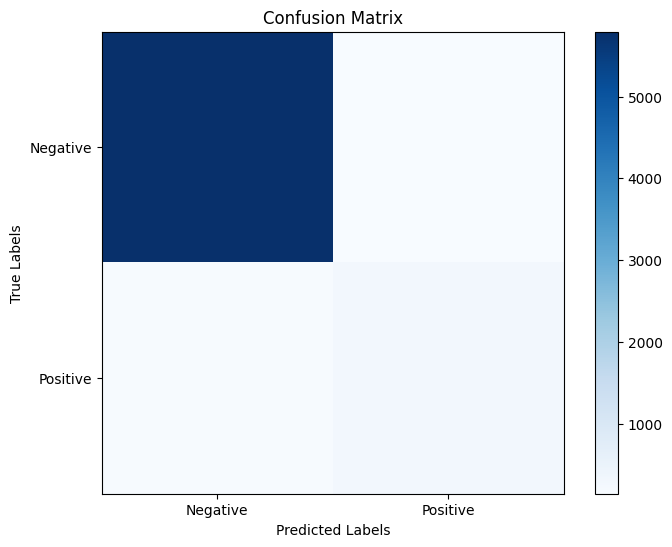

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

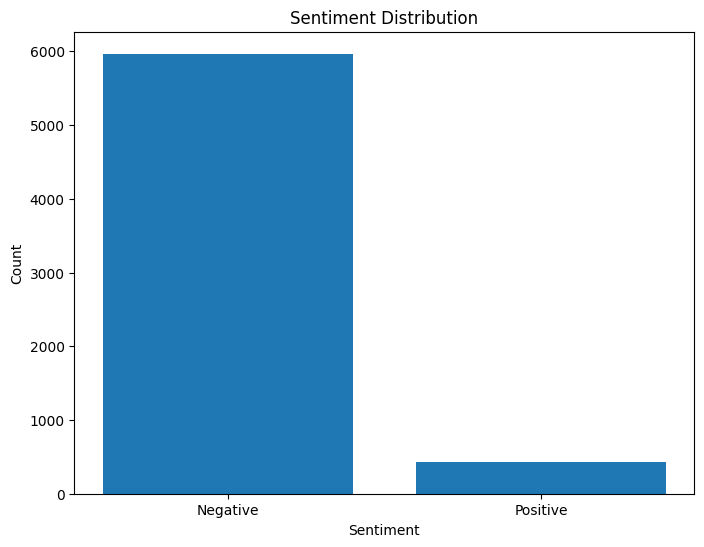

In [ ]:
# Count the number of tweets for each sentiment
sentiment_counts = np.bincount(y_pred_labels)

# Define the sentiment labels
sentiment_labels = ['Negative', 'Positive']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, sentiment_counts)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
from tensorflow.keras.utils import plot_model

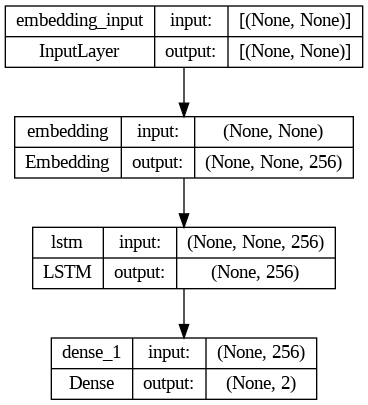

In [ ]:
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

Epoch 1/10
800/800 [==============================] - 270s 338ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.4746 - val_accuracy: 0.9468
Epoch 2/10
800/800 [==============================] - 217s 271ms/step - loss: 9.5219e-04 - accuracy: 0.9995 - val_loss: 0.4906 - val_accuracy: 0.9495
Epoch 3/10
800/800 [==============================] - 224s 281ms/step - loss: 9.7795e-04 - accuracy: 0.9997 - val_loss: 0.4861 - val_accuracy: 0.9524
Epoch 4/10
800/800 [==============================] - 213s 266ms/step - loss: 5.8663e-04 - accuracy: 0.9998 - val_loss: 0.4909 - val_accuracy: 0.9504
Epoch 5/10
800/800 [==============================] - 221s 276ms/step - loss: 5.0869e-04 - accuracy: 0.9998 - val_loss: 0.5073 - val_accuracy: 0.9507
Epoch 6/10
800/800 [==============================] - 210s 263ms/step - loss: 4.1116e-04 - accuracy: 0.9997 - val_loss: 0.5272 - val_accuracy: 0.9526
Epoch 7/10
800/800 [==============================] - 219s 274ms/step - loss: 4.2491e-04 - accuracy: 0.9

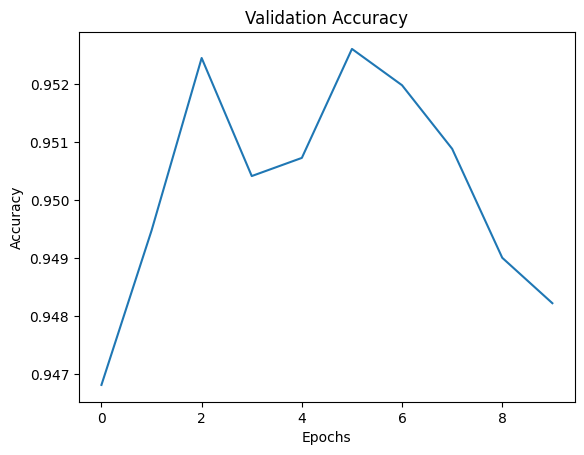

In [ ]:
# Plot the validation accuracy over epochs
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

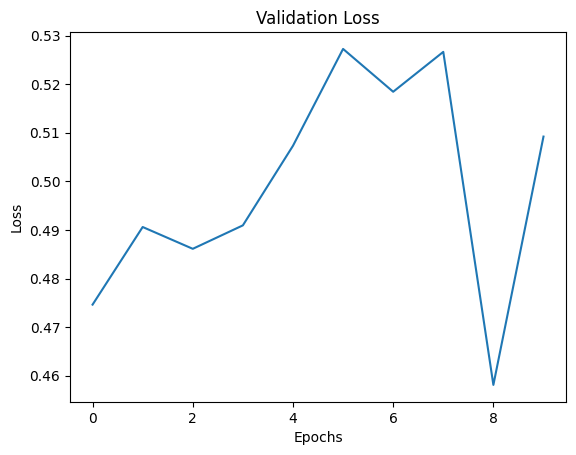

In [ ]:
# Plot the validation loss over epochs
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()